In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

In [3]:
s_columns = ["rango_edad","tipo_inst_2","jornada","tipo_plan_carr","region_sede","nivel_carrera_2","requisito_ingreso", \
    "vigencia_carrera","area_conocimiento","acreditada_carr","acreditada_inst","anio_ing_carr_ori","sem_ing_carr_ori", \
    "anio_ing_carr_act","sem_ing_carr_act",\
    "dur_total_carr", \
    "valor_matricula","valor_arancel"]
# Saqué "nomb_inst", "nomb_carrera", "dur_estudio_carr","dur_proceso_tit"

path_to_2015 = "../Data/2015.csv" # Hay que agregar el de cada uno.
df = pd.read_csv(path_to_2015) 
select = df.loc[:, s_columns]
all_dict = {}
for column in select.select_dtypes('object'):
    all_dict[column] = {value:i+1 for i, value in enumerate(select[column].unique()) if value is not np.nan}

print(all_dict)
all_dict["rango_edad"] = {'15 a 19 años':1,'20 a 24 años':2, '35 a 39 años':3, '25 a 29 años':4, '30 a 34 años':5, '40 y más años':6}
all_dict["nivel_carrera_2"] = {'Carreras Técnicas':1, 'Carreras Profesionales':2, 'Magister':3, 'Postítulo':4, 'Doctorado':5}
all_dict["acreditada_carr"] = {"NO ACREDITADA":0, "ACREDITADA":1}
all_dict["acreditada_inst"] = {"NO ACREDITADA":0, "ACREDITADA":1}

{'rango_edad': {'20 a 24 años': 1, '15 a 19 años': 2, '35 a 39 años': 3, '25 a 29 años': 4, '30 a 34 años': 5, '40 y más años': 6}, 'tipo_inst_2': {'Universidades Privadas': 1, 'Universidades CRUCH': 2, 'Institutos Profesionales': 3, 'Centros de Formación Técnica': 4}, 'jornada': {'Diurno': 1, 'Vespertino': 2, 'A Distancia': 3, 'Otro': 4, 'Semipresencial': 5}, 'tipo_plan_carr': {'Plan Regular': 1, 'Plan Regular de Continuidad': 2, 'Plan Especial': 3}, 'region_sede': {'Metropolitana': 1, 'Coquimbo': 2, 'Tarapacá': 3, 'Arica y Parinacota': 4, 'Valparaíso': 5, 'Ñuble': 6, 'Antofagasta': 7, 'Atacama': 8, 'Biobío': 9, "Lib. Gral B. O'Higgins": 10, 'La Araucanía': 11, 'Maule': 12, 'Los Lagos': 13, 'Magallanes': 14, 'Los Ríos': 15, 'Aysén': 16}, 'nivel_carrera_2': {'Carreras Profesionales': 1, 'Carreras Técnicas': 2, 'Magister': 3, 'Postítulo': 4, 'Doctorado': 5}, 'requisito_ingreso': {'Educación Media': 1, 'Licenciatura': 2, 'Título Profesional': 4, 'Técnico de Nivel Superior': 5, 'Magíster'

In [4]:
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d
    
def plotproxi(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    dist = sim_matrix(data, model.labels_)
    im = ax2.imshow(dist, cmap="jet")
    fig.colorbar(im, ax=ax2)

# Podemos seleccionar un atributo, y ordenar los clusters de acuerdo
# a la cantidad de cierta caracteristica en el atributo.
def right_tag(df, model,  n_clusters, col="area_conocimiento", value="Ciencias Básicas"):
    indx = all_dict[col][value]
    quantities = np.zeros(n_clusters)
    for cluster in range(n_clusters):
        count = df.loc[model.labels_==cluster,:][col].value_counts()
        try: val = count.loc[indx]
        except: val = 0
        quantities[cluster] = val
    neworder = np.argsort(quantities)
    model.labels_ = np.array([neworder[label] for label in model.labels_])
    #return 

n° de instancias:  10000


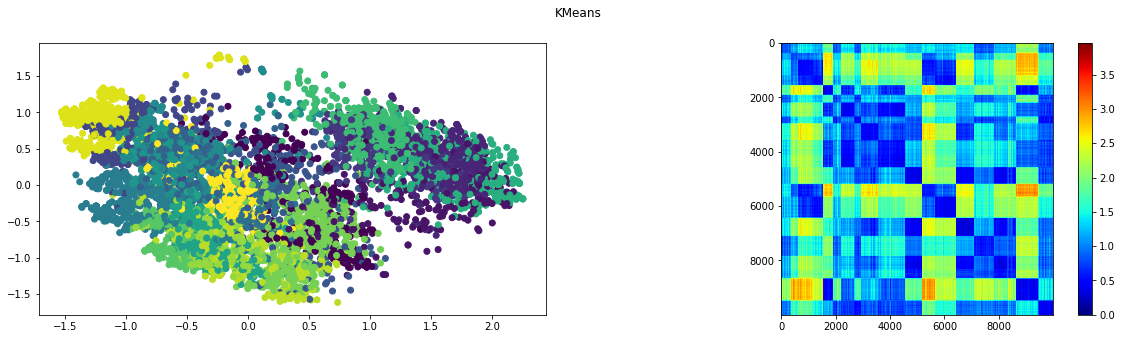

d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


n° de instancias usadas:  10000
Silhouete del espacio PCA con KMeans Clustering	 -0.011323790682246496
Silhouette del espacio one-hot con KMeans Clustering	 0.07710562796231614

n° de instancias:  10000


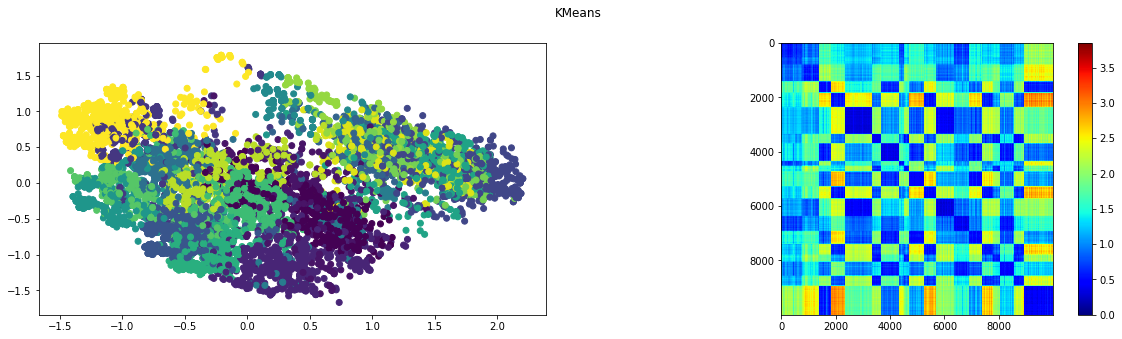

d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


n° de instancias usadas:  10000
Silhouete del espacio PCA con KMeans Clustering	 0.035365353341361205
Silhouette del espacio one-hot con KMeans Clustering	 0.08149195910951157

n° de instancias:  10000


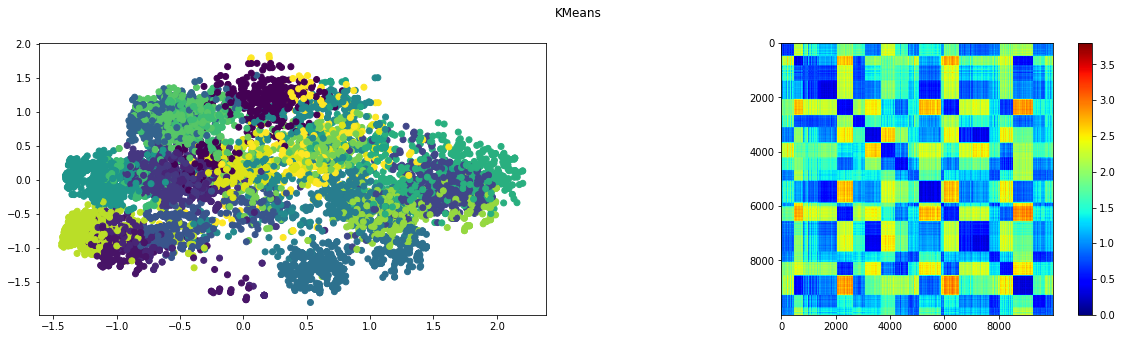

d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


n° de instancias usadas:  10000
Silhouete del espacio PCA con KMeans Clustering	 0.044159060968920916
Silhouette del espacio one-hot con KMeans Clustering	 0.0806740615210053

n° de instancias:  10000


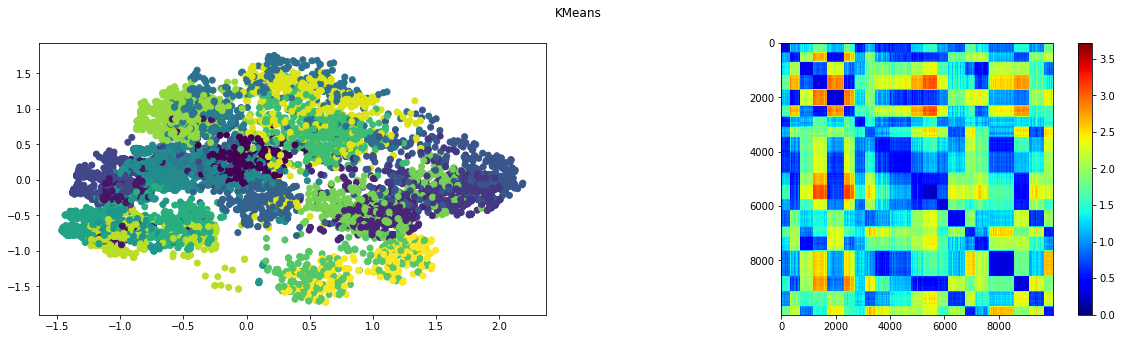

d:\Proyectos\Python_proyects\Algos-y-Estructuras\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


n° de instancias usadas:  10000
Silhouete del espacio PCA con KMeans Clustering	 0.08423410575319476
Silhouette del espacio one-hot con KMeans Clustering	 0.07936110574473496



In [5]:
used = 10000
n_clus = 20 # Ideal: 20
np.random.seed(10)
n_years = 10
ndims = 2

select_columns = s_columns.copy()
for nn in ['requisito_ingreso', 'vigencia_carrera']:
    try: select_columns.remove(nn)
    except: pass
    try: all_dict.pop(nn)
    except: pass

macro_varancel = np.zeros(n_years)
macro_vmatricula = np.zeros(n_years)
macro_areaconocimiento = np.zeros(n_years, dtype='object')
macro_acredcarr = np.zeros(n_years, dtype='object')

centroid_coord = np.zeros((n_years, n_clus, ndims))
for i in range(n_years):
    path = f"../Data/201{i}.csv" # Hay que agregar el de cada uno.
    df = pd.read_csv(path, nrows=None)
    sample = np.random.choice(len(df), used)

    macro_varancel[i] = df["valor_arancel"].mean()
    macro_vmatricula[i] = df["valor_matricula"].mean()
    macro_acredcarr[i] = df["acreditada_carr"].value_counts().index[0]
    macro_areaconocimiento[i] = df["area_conocimiento"].value_counts().index[0]
    
    #Se escoger al azar 'used' número de instancias.
    df = df.loc[sample, select_columns]
    for attribute in all_dict:
        df[attribute] = df[attribute].map(all_dict[attribute])
    df.iloc[:,:-2] = df.iloc[:,:-2].convert_dtypes(np.int32)
    dumm = pd.get_dummies(df, prefix=select_columns[:-2], columns=select_columns[:-2])

    print("n° de instancias: ", len(df))
    
    kmean = KMeans(n_clusters=n_clus).fit(dumm.iloc[:,2:])
    right_tag(df,kmean,n_clus) # Nuevas labels por contenido.

    pca = PCA(n_components=ndims, random_state=1).fit(dumm.iloc[:,2:])
    new_space = pca.transform(dumm.iloc[:,2:])
    plotproxi(new_space, kmean)
    plt.show()
    centroid_coord[i, :, :] = pca.transform(kmean.cluster_centers_)
    
    print("n° de instancias usadas: ", used)
    print("Silhouete del espacio PCA con KMeans Clustering\t", silhouette_score(new_space, kmean.labels_))
    print("Silhouette del espacio one-hot con KMeans Clustering\t", silhouette_score(dumm.iloc[:,2:], kmean.labels_))
    print()

for centroid in range(n_clus):
    a = centroid_coord[:-1,centroid,:]
    print(a[:,0])
    b = centroid_coord[1:,centroid,:]
    plt.quiver(a[:,0], a[:,1], b[:,0]-a[:,0], b[:,1]-a[:,1], scale_units='xy', angles='xy', scale=1)
    plt.show()
